c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Độ chính xác: 1.0


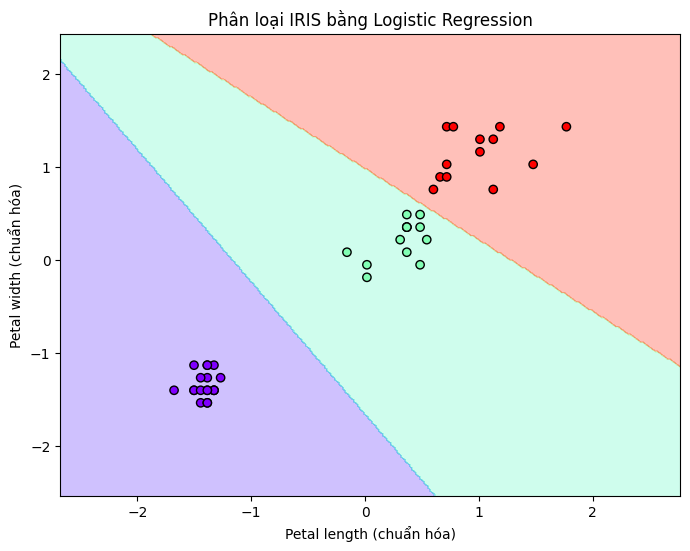

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Đọc dữ liệu từ file iris.csv
df = pd.read_csv('iris.csv')

# 2. Chọn 2 đặc trưng để phân loại và nhãn
X = df[['petal_length', 'petal_width']].values
y_text = df['species'].values

# 3. Chuyển nhãn từ text sang số (Setosa:0, Versicolor:1, Virginica:2)
labels = np.unique(y_text)
label_to_num = {label: i for i, label in enumerate(labels)}
y = np.array([label_to_num[label] for label in y_text])

# 4. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Huấn luyện Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

# 7. Dự đoán và đánh giá
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

# 8. Vẽ đường phân cách (decision boundary)
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.rainbow)
    plt.xlabel("Petal length (chuẩn hóa)")
    plt.ylabel("Petal width (chuẩn hóa)")
    plt.title("Phân loại IRIS bằng Logistic Regression")
    plt.show()

plot_decision_boundary(model, X_test_scaled, y_test)


Epoch 0, Loss: 1.0986
Epoch 100, Loss: 0.3749
Epoch 200, Loss: 0.2811
Epoch 300, Loss: 0.2334
Epoch 400, Loss: 0.2040
Epoch 500, Loss: 0.1841
Epoch 600, Loss: 0.1696
Epoch 700, Loss: 0.1585
Epoch 800, Loss: 0.1498
Epoch 900, Loss: 0.1427
Độ chính xác toàn bộ tập dữ liệu: 0.9533333333333334


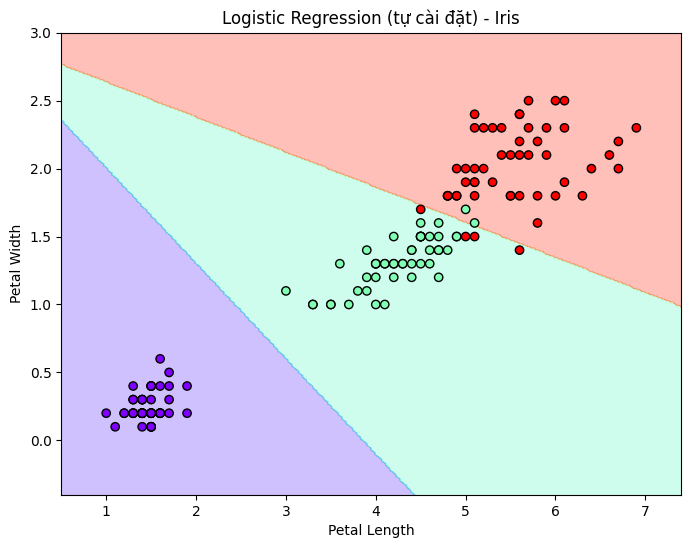

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
df = pd.read_csv('iris.csv')
X = df[['petal_length', 'petal_width']].values  # chọn 2 đặc trưng
y_text = df['species'].values

# 2. Chuyển nhãn thành số (Setosa = 0, Versicolor = 1, Virginica = 2)
labels = np.unique(y_text)
label_to_num = {label: i for i, label in enumerate(labels)}
y = np.array([label_to_num[label] for label in y_text])  # (150,)

# 3. One-hot encode nhãn: y (150,) => Y (150, 3)
num_classes = len(np.unique(y))
Y = np.zeros((y.shape[0], num_classes))
Y[np.arange(y.shape[0]), y] = 1

# 4. Chuẩn hóa đặc trưng
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std  # (150, 2)

# 5. Thêm cột bias (x0 = 1) vào X
X_bias = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])  # (150, 3)

# 6. Khởi tạo tham số
n_samples, n_features = X_bias.shape
W = np.zeros((n_features, num_classes))  # (3, 3)
learning_rate = 0.1
epochs = 1000

# 7. Hàm softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # tránh tràn số
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# 8. Huấn luyện bằng Gradient Descent
for epoch in range(epochs):
    z = X_bias @ W            # (150, 3)
    y_hat = softmax(z)        # (150, 3)
    error = y_hat - Y         # (150, 3)
    gradient = X_bias.T @ error / n_samples  # (3, 3)
    W -= learning_rate * gradient

    if epoch % 100 == 0:
        loss = -np.mean(np.sum(Y * np.log(y_hat + 1e-8), axis=1))
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# 9. Dự đoán
def predict(X_input):
    Xn = (X_input - X_mean) / X_std
    Xb = np.hstack([np.ones((Xn.shape[0], 1)), Xn])
    probs = softmax(Xb @ W)
    return np.argmax(probs, axis=1)

# 10. Tính độ chính xác
y_pred = predict(X)
acc = np.mean(y_pred == y)
print("Độ chính xác toàn bộ tập dữ liệu:", acc)

# 11. Vẽ decision boundary
def plot_decision_boundary(predict_func, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_func(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.rainbow)
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.title("Logistic Regression (tự cài đặt) - Iris")
    plt.show()

plot_decision_boundary(predict, X, y)
